In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!pip install -q japanize-matplotlib 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 67.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib

# 富士山から下る

標高データの取得

In [11]:
#@@@ csvファイルの読み込み
# 相模湾から富士山頂上付近を通り南アルプス方面へと向かう線上300地点の標高データ
# column：「その地点の番号」「緯度」「経度」「標高(m)」「地点0からの距離(m)」
folder = '/content/drive/MyDrive/Colab Notebooks/D-lab/deta/'
file = 'mtfuji_data.csv'
csv_path = folder + file
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
fuji

array([[    0.      ,    35.134141,   139.132082,     0.      ,
            0.      ],
       [    1.      ,    35.135826,   139.129202,     0.      ,
          322.      ],
       [    2.      ,    35.13751 ,   139.126322,     0.      ,
          644.      ],
       ...,
       [  297.      ,    35.631284,   138.271368,  1973.99    ,
        95698.      ],
       [  298.      ,    35.632947,   138.268452,  1841.36    ,
        96020.      ],
       [  299.      ,    35.63461 ,   138.265536,  1725.8     ,
        96343.      ]])

【問題1】データの可視化

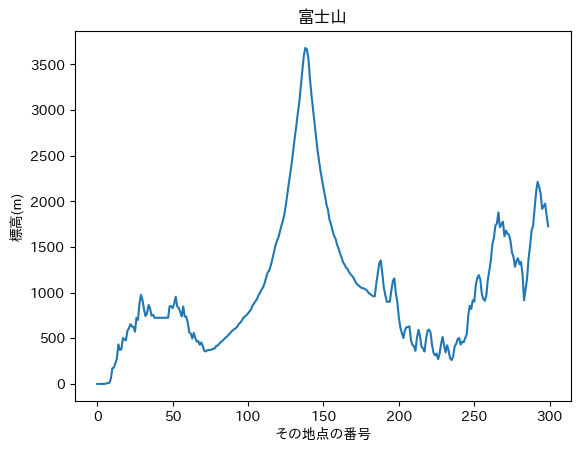

In [22]:
plt.plot(fuji[:,0],fuji[:,3])
plt.title("富士山")
plt.xlabel("その地点の番号")
plt.ylabel("標高(m)")
plt.show()

【問題2】ある地点の勾配を計算する関数を作成

In [23]:
# x(標高)
x = fuji[:,0]
# y(その地点の番号)
y = fuji[:,3]

In [38]:
def gradient(point):
    """
    「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を計算する。

    gradient
    ----------------
    point : int
      今いる隣の地点の番号

    Returns 
    ----------------
    勾配　float
    """

    # 変化量
    d_x = x[point]-x[point-1]
    d_y = y[point]-y[point-1]
    # 勾配
    return d_y/d_x

【問題3】移動先の地点を計算する関数を作成

In [42]:
def gmove(point,lr=0.2):
    """
    今いる地点の勾配の情報を元に、次に移動先の地点を計算する。

    grad
    ----------------
    point：int
    　今いる隣の地点の番号
    lr：float
    　学習率　※デフォルト0.2

    Returns
    ----------------
    move
    　移動先の地点
    """
    move = int(np.round((point - lr*gradient(point))))
    if move <0:
        print("Error:移動先の地点が負になりました")
        return

    return move

In [45]:
gmove(11)

10

【問題4】山を下る関数を作成

In [60]:
downs=[]
if len(downs)!=0:print("ss")

In [98]:
def mt_down(lr=0.2):
    """
    山を下る移動先の地点を計算する。

    mt_down
    ----------------
    Returns
    ----------------
    move：int
    　山を下りきった移動先の地点
    """
    point=136
    downs=[999]
    while True:
        down=gmove(point,lr)
        if downs[-1]==down:break
        downs.append(down)
        point=down
    del downs[0]
    return downs

In [99]:
moves=mt_down()

【問題5】下山過程の可視化

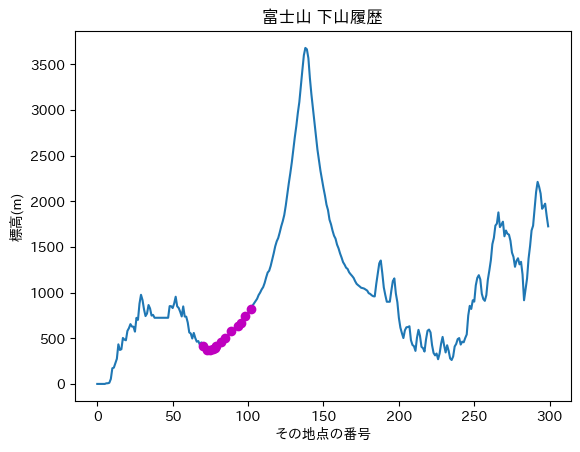

In [100]:
plt.plot(fuji[:,0],fuji[:,3])
plt.title("富士山 下山履歴")
plt.xlabel("その地点の番号")
plt.ylabel("標高(m)")
for move in moves:
    plt.plot(move,fuji[move,3],'om')
plt.show()

【問題6】初期値の変更

In [102]:
def mt_downA(point,lr=0.2):
    """
    山を下る移動先の地点を計算する。

    mt_down
    ----------------
    point：int
    　今いる隣の地点の番号

    Returns
    ----------------
    move：int
    　山を下りきった移動先の地点
    """
    downs=[999]
    while True:
        down=gmove(point,lr)
        if downs[-1]==down:break
        downs.append(down)
        point=down
    del downs[0]
    return downs

【問題7】初期値ごとの下山過程の可視化

In [103]:
moves1=mt_downA(136)

In [104]:
moves2=mt_downA(100)

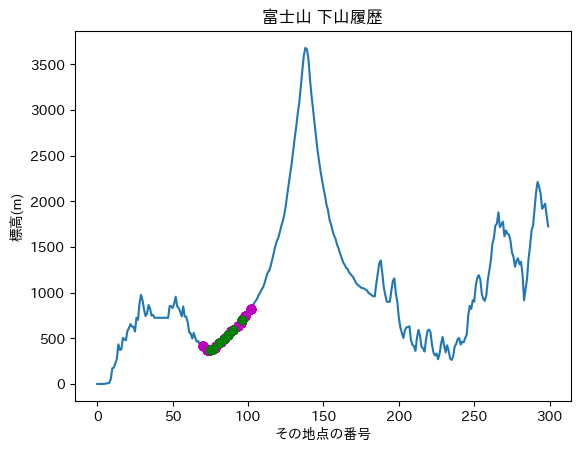

In [105]:
plt.plot(fuji[:,0],fuji[:,3])
plt.title("富士山 下山履歴")
plt.xlabel("その地点の番号")
plt.ylabel("標高(m)")
for move1 in moves:
    plt.plot(moves1,fuji[moves1,3],'om')
    plt.plot(moves2,fuji[moves2,3],'og')
plt.show()

【問題8】（アドバンス問題）ハイパーパラメータの変更

In [106]:
moves1=mt_downA(136)
moves3=mt_downA(136,lr=0.02)

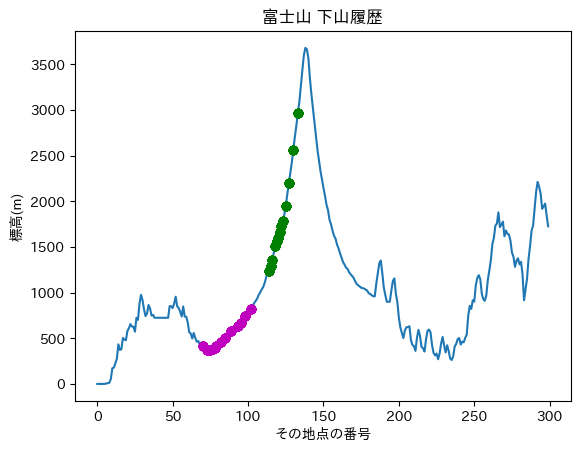

In [107]:
plt.plot(fuji[:,0],fuji[:,3])
plt.title("富士山 下山履歴")
plt.xlabel("その地点の番号")
plt.ylabel("標高(m)")
for move1 in moves:
    plt.plot(moves1,fuji[moves1,3],'om')
    plt.plot(moves3,fuji[moves3,3],'og')
plt.show()